In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import wrangle as w
import prepare as p
import acquire as a

# **Exercises II - Challenge**

**Our Zillow scenario continues:**

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.



Come up with some initial hypotheses based on your goal of predicting property value.

Visualize all combinations of variables in some way.

Run the appropriate statistical tests where needed.

What independent variables are correlated with the dependent variable, home value?

Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.



# **Q1**
Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.



In [2]:
df = w.wrangle_zillow()
df.head().T

,4,6,7,18,19
bedroomcnt,4.00,3.00,3.00,3.00,3.00
bathroomcnt,2.00,4.00,2.00,1.00,2.00
calculatedfinishedsquarefeet,3633.00,1620.00,2077.00,1244.00,1300.00
taxvaluedollarcnt,296425.00,847770.00,646760.00,169471.00,233266.00
yearbuilt,2005.00,2011.00,1926.00,1950.00,1950.00
taxamount,6941.39,10244.94,7924.68,2532.88,3110.99
fips,6037.00,6037.00,6037.00,6037.00,6037.00


In [3]:
def split_data(df, stratify_by=""):
    '''
    take in a DataFrame and return train, validate, and test DataFrames.
    
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123)
    print(f'train -> {train.shape}')
    print(f'validate -> {validate.shape}')
    print(f'test -> {test.shape}')                                  
    return train, validate, test

In [4]:
train, validate, test = w.split_data(df)

train -> (1161886, 7)
validate -> (497952, 7)
test -> (414960, 7)


In [5]:
# Some prep
df = df.rename(columns={"bedroomcnt": "bedrooms", "bathroomcnt": "bathrooms", "calculatedfinishedsquarefeet": "square_feet", "taxamount": "taxes", "taxvaluedollarcnt": "tax_value"})

In [6]:
df.head().T

,4,6,7,18,19
bedrooms,4.00,3.00,3.00,3.00,3.00
bathrooms,2.00,4.00,2.00,1.00,2.00
square_feet,3633.00,1620.00,2077.00,1244.00,1300.00
tax_value,296425.00,847770.00,646760.00,169471.00,233266.00
yearbuilt,2005.00,2011.00,1926.00,1950.00,1950.00
taxes,6941.39,10244.94,7924.68,2532.88,3110.99
fips,6037.00,6037.00,6037.00,6037.00,6037.00


In [7]:
features = [
    "bedrooms",
    "bathrooms",
    "square_feet",
    "taxes",
    "yearbuilt",
    "tax_value"
]

df = df[features]
df = df.set_index("yearbuilt")

# Let's drop the nulls
df = df.dropna()

In [8]:
train, validate, test = split_data(df, stratify_by="taxes")

train -> (1161886, 5)
validate -> (497952, 5)
test -> (414960, 5)


<AxesSubplot:xlabel='square_feet', ylabel='tax_value'>

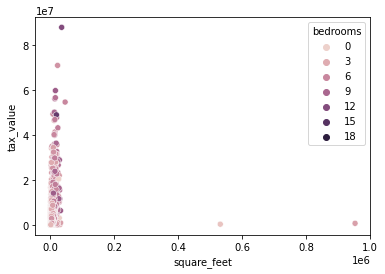

In [12]:
sns.scatterplot(x="square_feet", y="tax_value", data=train, hue="bedrooms")

